In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib Inline
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

# Importing Data

In [3]:
logs=pd.read_csv('litho.csv')

In [3]:
logs.head()

,Lithology,CALI.in,DRHO.g/cm3,NPHI.m3/m3,RHOB.g/cm3,GR.gAPI,DTC.us/ft
0,13.0,7.6,2.60,0.16,2.60,60.16,74.98
1,13.0,7.6,2.61,0.15,2.61,55.74,75.58
2,13.0,7.6,2.64,0.15,2.64,52.77,76.91
3,13.0,7.6,2.62,0.14,2.62,55.47,77.87
4,13.0,7.6,2.61,0.14,2.61,56.58,78.36


In [4]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002859 entries, 0 to 1002858
Data columns (total 7 columns):
Lithology     1002859 non-null float64
CALI.in       1002859 non-null float64
DRHO.g/cm3    1002859 non-null float64
NPHI.m3/m3    1002859 non-null float64
RHOB.g/cm3    1002859 non-null float64
GR.gAPI       1002859 non-null float64
DTC.us/ft     1002859 non-null float64
dtypes: float64(7)
memory usage: 53.6 MB


# Data Pre-Processing

In [5]:
logs.replace(-999.25, np.nan, inplace = True)

In [6]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002859 entries, 0 to 1002858
Data columns (total 7 columns):
Lithology     521399 non-null float64
CALI.in       959031 non-null float64
DRHO.g/cm3    920936 non-null float64
NPHI.m3/m3    654105 non-null float64
RHOB.g/cm3    923115 non-null float64
GR.gAPI       983640 non-null float64
DTC.us/ft     941974 non-null float64
dtypes: float64(7)
memory usage: 53.6 MB


In [7]:
logs.columns

Index(['Lithology', 'CALI.in', 'DRHO.g/cm3', 'NPHI.m3/m3', 'RHOB.g/cm3',
       'GR.gAPI', 'DTC.us/ft'],
      dtype='object')

In [8]:
logs.drop('DRHO.g/cm3', axis = 1, inplace=True)

In [9]:
logs.head()

,Lithology,CALI.in,NPHI.m3/m3,RHOB.g/cm3,GR.gAPI,DTC.us/ft
0,13.0,7.6,0.16,2.60,60.16,74.98
1,13.0,7.6,0.15,2.61,55.74,75.58
2,13.0,7.6,0.15,2.64,52.77,76.91
3,13.0,7.6,0.14,2.62,55.47,77.87
4,13.0,7.6,0.14,2.61,56.58,78.36


In [10]:
logs.dropna(inplace = True)

In [11]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402807 entries, 0 to 1002768
Data columns (total 6 columns):
Lithology     402807 non-null float64
CALI.in       402807 non-null float64
NPHI.m3/m3    402807 non-null float64
RHOB.g/cm3    402807 non-null float64
GR.gAPI       402807 non-null float64
DTC.us/ft     402807 non-null float64
dtypes: float64(6)
memory usage: 21.5 MB


In [12]:
logs['Lithology'].astype('int64', inplace = True).head()

0    13
1    13
2    13
3    13
4    13
Name: Lithology, dtype: int64

In [13]:
logs.describe()

,Lithology,CALI.in,NPHI.m3/m3,RHOB.g/cm3,GR.gAPI,DTC.us/ft
count,402807.000000,402807.000000,402807.000000,402807.000000,402807.000000,402807.000000
mean,7.066866,11.030638,2.472389,2.506419,75.582505,92.511062
std,4.207986,2.948357,8.441633,0.949184,58.707185,40.099325
min,1.000000,0.000000,-0.130000,0.850000,0.350000,-68.250000
25%,5.000000,8.650000,0.210000,2.370000,50.510000,79.210000
50%,6.000000,10.650000,0.300000,2.480000,72.120000,89.320000
75%,7.000000,12.720000,0.380000,2.570000,96.100000,103.380000
max,34.000000,22.720000,937.880000,92.620000,9133.780000,9119.790000


In [14]:
def rep(density):
    if density > 7:
        return -999.25
    else:
        return density

In [15]:
logs['RHOB.g/cm3'].apply(rep)
logs['RHOB.g/cm3'].head()

0    2.60
1    2.61
2    2.64
3    2.62
4    2.61
Name: RHOB.g/cm3, dtype: float64

In [16]:
logs.dropna(inplace = True)

In [17]:
loged = logs[logs['RHOB.g/cm3']<3]

In [18]:
loged.describe()

,Lithology,CALI.in,NPHI.m3/m3,RHOB.g/cm3,GR.gAPI,DTC.us/ft
count,399418.000000,399418.000000,399418.000000,399418.000000,399418.000000,399418.000000
mean,7.055093,11.049981,2.478999,2.450465,75.760679,92.255609
std,4.208677,2.951901,8.073684,0.166177,33.698198,17.586224
min,1.000000,0.000000,-0.080000,0.850000,0.350000,-68.250000
25%,5.000000,8.660000,0.210000,2.370000,51.020000,79.230000
50%,6.000000,10.760000,0.300000,2.480000,72.470000,89.270000
75%,7.000000,12.730000,0.380000,2.570000,96.277500,103.250000
max,34.000000,22.720000,63.490000,2.990000,536.600000,482.470000


In [19]:
loged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399418 entries, 0 to 1002768
Data columns (total 6 columns):
Lithology     399418 non-null float64
CALI.in       399418 non-null float64
NPHI.m3/m3    399418 non-null float64
RHOB.g/cm3    399418 non-null float64
GR.gAPI       399418 non-null float64
DTC.us/ft     399418 non-null float64
dtypes: float64(6)
memory usage: 21.3 MB


In [20]:
loged = loged[loged['GR.gAPI']<300]

In [21]:
loged.describe()

,Lithology,CALI.in,NPHI.m3/m3,RHOB.g/cm3,GR.gAPI,DTC.us/ft
count,399281.000000,399281.000000,399281.000000,399281.000000,399281.000000,399281.000000
mean,7.053075,11.050501,2.479390,2.450496,75.662672,92.256337
std,4.207217,2.952096,8.074198,0.166139,33.275071,17.587159
min,1.000000,0.000000,-0.080000,0.850000,0.350000,-68.250000
25%,5.000000,8.660000,0.210000,2.370000,51.010000,79.230000
50%,6.000000,10.760000,0.300000,2.480000,72.440000,89.260000
75%,7.000000,12.730000,0.380000,2.570000,96.250000,103.250000
max,34.000000,22.720000,63.490000,2.990000,299.770000,482.470000


In [22]:
loged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399281 entries, 0 to 1002768
Data columns (total 6 columns):
Lithology     399281 non-null float64
CALI.in       399281 non-null float64
NPHI.m3/m3    399281 non-null float64
RHOB.g/cm3    399281 non-null float64
GR.gAPI       399281 non-null float64
DTC.us/ft     399281 non-null float64
dtypes: float64(6)
memory usage: 21.3 MB


In [23]:
loged = loged[loged['DTC.us/ft']<=300]

In [24]:
loged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399280 entries, 0 to 1002768
Data columns (total 6 columns):
Lithology     399280 non-null float64
CALI.in       399280 non-null float64
NPHI.m3/m3    399280 non-null float64
RHOB.g/cm3    399280 non-null float64
GR.gAPI       399280 non-null float64
DTC.us/ft     399280 non-null float64
dtypes: float64(6)
memory usage: 21.3 MB


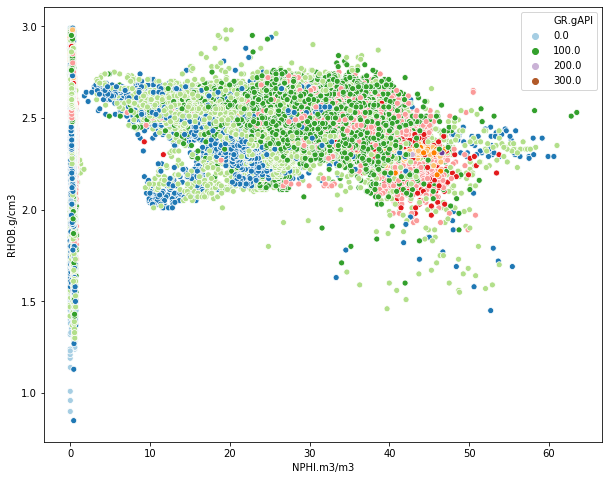

In [25]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='NPHI.m3/m3', y='RHOB.g/cm3', data = loged, hue = 'GR.gAPI',palette='Paired')

In [26]:
loged = loged[loged['NPHI.m3/m3']<0.7]

In [27]:
loged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369424 entries, 0 to 1002768
Data columns (total 6 columns):
Lithology     369424 non-null float64
CALI.in       369424 non-null float64
NPHI.m3/m3    369424 non-null float64
RHOB.g/cm3    369424 non-null float64
GR.gAPI       369424 non-null float64
DTC.us/ft     369424 non-null float64
dtypes: float64(6)
memory usage: 19.7 MB


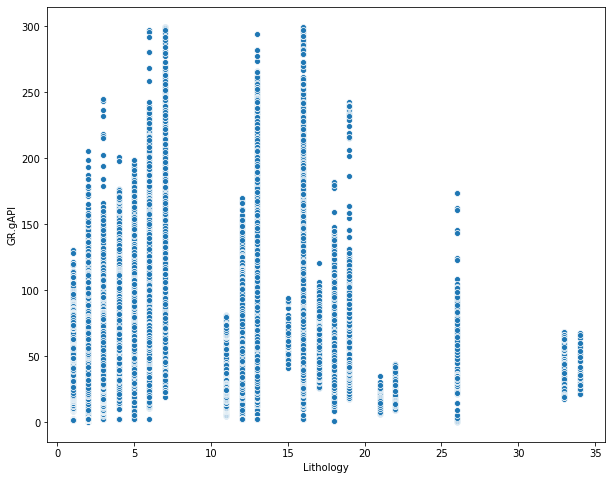

In [28]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='Lithology', y='GR.gAPI', data = loged)

In [29]:
loged.corr()

,Lithology,CALI.in,NPHI.m3/m3,RHOB.g/cm3,GR.gAPI,DTC.us/ft
Lithology,1.000000,0.119972,0.149425,0.015728,0.175424,0.163778
CALI.in,0.119972,1.000000,0.411291,-0.311494,-0.135291,0.402304
NPHI.m3/m3,0.149425,0.411291,1.000000,-0.427579,0.323363,0.752046
RHOB.g/cm3,0.015728,-0.311494,-0.427579,1.000000,0.109871,-0.621762
GR.gAPI,0.175424,-0.135291,0.323363,0.109871,1.000000,0.188418
DTC.us/ft,0.163778,0.402304,0.752046,-0.621762,0.188418,1.000000


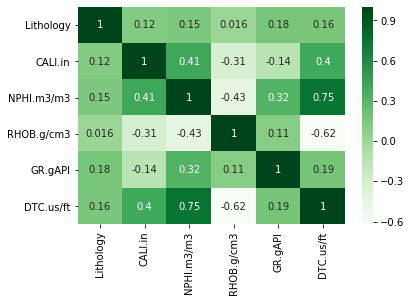

In [30]:
sns.heatmap(loged.corr(), cmap='Greens', annot = True)

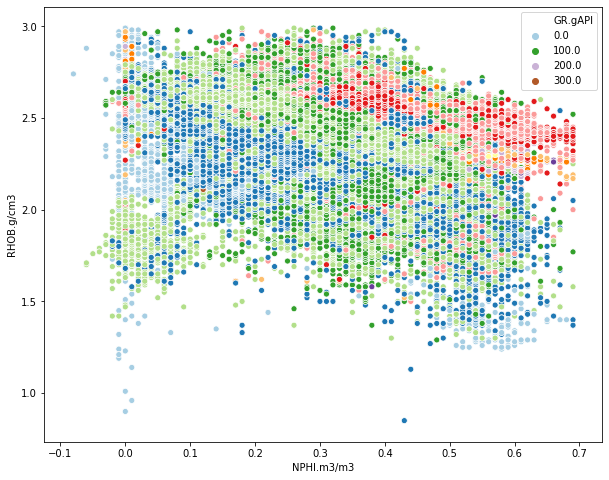

In [31]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='NPHI.m3/m3', y='RHOB.g/cm3', data = loged, hue = 'GR.gAPI',palette='Paired')

In [32]:
loged.columns

Index(['Lithology', 'CALI.in', 'NPHI.m3/m3', 'RHOB.g/cm3', 'GR.gAPI',
       'DTC.us/ft'],
      dtype='object')

In [33]:
loged = loged[loged['RHOB.g/cm3']>0]

In [34]:
loged = loged[loged['DTC.us/ft']>0]

In [35]:
loged.describe()

,Lithology,CALI.in,NPHI.m3/m3,RHOB.g/cm3,GR.gAPI,DTC.us/ft
count,369412.000000,369412.000000,369412.000000,369412.000000,369412.000000,369412.000000
mean,7.083081,11.031816,0.284920,2.448480,75.423468,92.369922
std,4.250760,2.995925,0.107847,0.168748,34.033702,17.817341
min,1.000000,0.000000,-0.080000,0.850000,0.350000,0.430000
25%,5.000000,8.650000,0.210000,2.370000,50.030000,79.190000
50%,6.000000,10.590000,0.290000,2.480000,71.750000,89.120000
75%,7.000000,12.720000,0.360000,2.570000,96.810000,103.582500
max,34.000000,22.720000,0.690000,2.990000,299.770000,230.040000


In [36]:
loged.to_csv('loged')

In [37]:
loged = pd.read_csv('loged')

In [38]:
#loged['CALI.in']=(loged['CALI.in'].max()-loged['CALI.in'])/loged['CALI.in'].max()
#loged['NPHI.m3/m3']=(loged['NPHI.m3/m3'].max()-loged['NPHI.m3/m3'])/loged['NPHI.m3/m3'].max()
#loged['RHOB.g/cm3']=(loged['RHOB.g/cm3'].max()-loged['RHOB.g/cm3'])/loged['RHOB.g/cm3'].max()
#loged['GR.gAPI']=(loged['GR.gAPI'].max()-loged['GR.gAPI'])/loged['GR.gAPI'].max()
#loged['DTC.us/ft']=(loged['DTC.us/ft'].max()-loged['DTC.us/ft'])/loged['DTC.us/ft'].max()

In [39]:
X=loged[['CALI.in', 'NPHI.m3/m3', 'RHOB.g/cm3', 'GR.gAPI','DTC.us/ft']]
y=loged['Lithology']

In [40]:
y.replace(31, 1, inplace=True)
y.replace(2, 1, inplace=True)
y.replace(3, 1, inplace=True)
y.replace(35, 1, inplace=True)
y.replace(36, 4, inplace=True)
y.replace(6, 5, inplace=True)
y.replace(8, 7, inplace=True)
y.replace(16, 10, inplace=True)
y.replace(9, 11, inplace=True)
y.replace(31, 11, inplace=True)
y.replace(12, 14, inplace=True)
y.replace(13, 14, inplace=True)
y.replace(23, 20, inplace=True)
y.replace(24, 20, inplace=True)
y.replace(19, 20, inplace=True)
y.replace(28, 20, inplace=True)
y.replace(29, 20, inplace=True)
y.replace(30, 1, inplace=True)
y.replace(27, 21, inplace=True)
y.replace(32, 21, inplace=True)
y.replace(33, 21, inplace=True)
y.replace(34, 21, inplace=True)

In [41]:
y.nunique()

14

# Splitting Training and testing

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# One-Hot Encoding

In [ ]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

In [43]:
X_test.shape

(73883, 5)

In [44]:
y_test.shape

(73883,)

# Artificial Neural Network Model

In [4]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LeakyReLU

In [7]:
model = Sequential()
model.add(Dense(16,input_dim= 5, activation = 'elu'))
model.add(Dense(32,activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='elu'))
model.add(Dense(27,activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 27)                3483      
Total params: 14,555
Trainable params: 14,555
Non-trainable params: 0
__________________________________________________

In [10]:
# Training

In [ ]:
from keras.optimizers import SGD
model.compile(optimizer ="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=5, epochs = 50, validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plotting our loss charts

In [ ]:

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting our accuracy charts

In [ ]:

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Random Forest Classifier

In [48]:
from sklearn.metrics import classification_report

## Training

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predicting

In [50]:
rfc_pred = rfc.predict(X_test)

## Evaluation

In [51]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         1.0       0.84      0.87      0.85     11086
         4.0       0.77      0.57      0.65      4135
         5.0       0.85      0.93      0.89     33078
         7.0       0.85      0.78      0.81      8806
        10.0       0.90      0.67      0.77      3563
        11.0       0.94      0.89      0.92      1289
        14.0       0.89      0.86      0.88      9720
        15.0       0.91      0.94      0.93       561
        17.0       0.86      0.53      0.66       189
        18.0       0.80      0.57      0.67       287
        20.0       0.93      0.81      0.87       818
        21.0       0.98      0.97      0.97       262
        22.0       0.89      0.57      0.70        28
        26.0       0.90      0.77      0.83        61

    accuracy                           0.85     73883
   macro avg       0.88      0.77      0.81     73883
weighted avg       0.85      0.85      0.85     73883

